# Valovi

Neka $x$ označava položaj, $t$ vrijeme, a $u$ veličinu poremećaja. Funkcija

$$
u(x,t)=f(x-ct)
$$

je __desni val__, odnosno val koji putuje udesno brzinom $c$. Vrijedi

$$
u_x=f'\cdot \frac{d(x-ct)}{dx}=f', \quad 
u_t=f'\cdot \frac{d(x-ct)}{dt}=-cf',
$$

što daje __advekcijsku__ parcijalnu diferencijalnu jednadžbu

$$
u_t+cu_x=0.
$$

Dakle, ako u trenutku $t=0$ poremećaj ima profil $u(x,0)=f(x)$ (početni uvjet), onda
se u trenutku $t>0$ poremećaj pomaknu udesno za $ct$ jedinica duljine.

Na sličan način __lijevi val__, $u(x,t)=f(x+ct)$, rješava jednadžbu $u_t-cu_x=0$.

Za lijevi val vrijedi

$$
u_x=f',\quad u_{xx}=f'',\quad u_t=cf',\quad u_{tt}=c^2f'',
$$

a za desni val vrijedi

$$
u_x=f',\quad u_{xx}=f'',\quad u_t=-cf',\quad u_{tt}=c^2f''.
$$

Dakle, i lijevi i desni val zadovoljavaju __valnu jednadžbu__

$$
u_{tt}-c^2u_{xx}=0.
$$

Obrnuto, zaključujemo da je rješenje valne jednadžbe proizlazi iz funkcije $f(x)$
kao superpozicija (zbroj) lijevog i desnog vala. 


__Primjer:__ Rješenje problema

$$
u_{tt}=u_{xx},\quad u(x,0)=\sin \pi x,
$$

je superpozicija lijevog vala 

$$
u_L(x,t)=\sin \pi (x+1\cdot t),
$$

i desnog vala 

$$
u_R(x,t)=\sin \pi (x-1\cdot t),
$$

odnosno,

$$
u(x,t)=\frac{1}{2}(u_L+u_R)=\frac{1}{2} [\sin \pi (x+t)+\sin \pi (x-t)]=
\sin \pi x \cos \pi t.
$$


In [1]:
using Gadfly
using Interact

Interact.Slider{Float64}(1: "input" = 0.0 Float64 , "", 0.0, 0.0:0.1:3.0, "horizontal", true, ".3f", true)

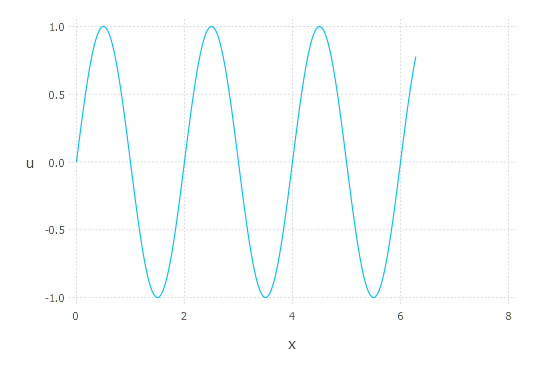

In [2]:
# Desni val
@manipulate for t in slider(0.0:0.1:3.0,value=0.0)
    u(x)=sin(pi*(x-t))
    Gadfly.plot(u,0,2*pi,Guide.xlabel("x"),Guide.ylabel("u"))
end

Interact.Slider{Float64}(5: "input-2" = 0.0 Float64 , "", 0.0, 0.0:0.1:3.0, "horizontal", true, ".3f", true)

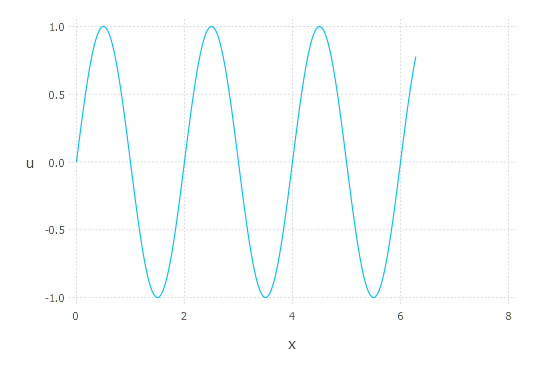

In [3]:
# Rješenje
@manipulate for t in slider(0.0:0.1:3.0,value=0.0)
    u(x)=sin(pi*x)*cos(pi*t)
    Gadfly.plot(u,0,2*pi,Guide.xlabel("x"),Guide.ylabel("u"))
end

In [4]:
using PyPlot

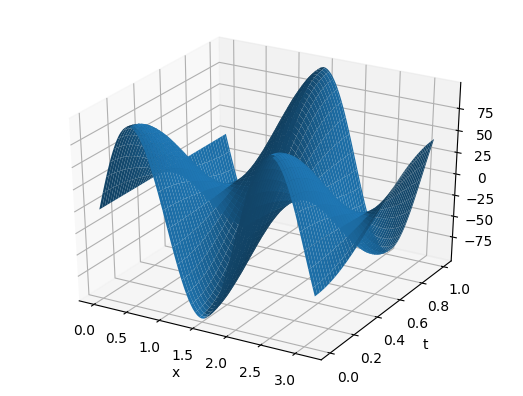

PyObject <matplotlib.text.Text object at 0x000000004615EE80>

In [5]:
# Cijelo rješenje
gridsize=100
x=linspace(0,pi,gridsize)
t=linspace(0,1,gridsize)
X=repmat(x,1,gridsize)
T=repmat(t',gridsize,1)
u(x,t)=sin.(pi*x)*cos.(pi*t)
U=u(X,T)
surf(X,T,U)
xlabel("x")
ylabel("t")

Definirajmo još neke pojmove vezane uz valnu funkciju

$$
u(x,t)=A\cos(kx-\omega t). 
$$

$A$ je __amplituda__. 

$k$ je __valni broj__, odnosno broj oscilacija u $2\pi$ jedinica prostora u danom trenutku $t$.

$\omega$ je __kutna frekvencija__, odnosno broj oscilacija u $2\pi$ jedinica vremena na zadanom mjestu $x$.

$\lambda=\displaystyle\frac{2\pi}{k}$ je __valna duljina__, odnosno udaljenost između susjednih kresta.

$P=\displaystyle\frac{2\pi}{\omega}$ je vremenski period, odnosno vrijeme nakon
kojeg se na mjestu $x$ ponavlja isti obrazac poremećaja.

$c=\displaystyle\frac{\omega}{k}$ je __brzina__ kojom val putuje udesno.

__Napomena:__ Može se koristiti i Euler-ov oblik $u(x,t)=Ae^{i(kx-\omega t)}$ i promatrati realni ili imaginarni dio kako bi se dobilo realno rješenje. 


Interact.Slider{Float64}(9: "input-3" = 1.0 Float64 , "", 1.0, 1.0:0.1:2.0, "horizontal", true, ".3f", true)

Interact.Slider{Float64}(11: "input-4" = 1.0 Float64 , "", 1.0, 0.5:0.1:3.0, "horizontal", true, ".3f", true)

Interact.Slider{Float64}(13: "input-5" = 1.0 Float64 , "", 1.0, 0.5:0.1:3.0, "horizontal", true, ".3f", true)

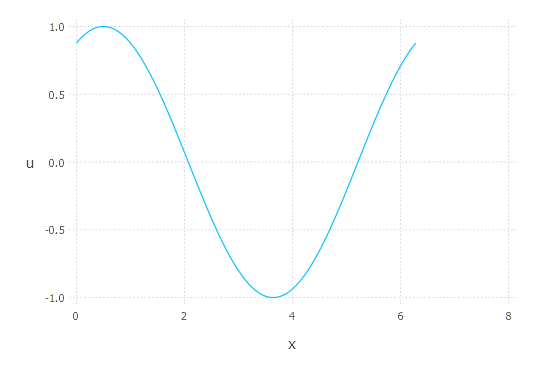

In [6]:
# Probajte za razne vrijednosti t
t=0.5
@manipulate for A in slider(1.0:0.1:2.0, value=1.0),
    k in slider(0.5:0.1:3.0, value=1.0),
    w in slider(0.5:0.1:3.0, value=1.0)
    u(x)=A*cos(k*x-w*t)
    Gadfly.plot(u,0,2*pi,Guide.xlabel("x"),Guide.ylabel("u"))
end

Interact.Slider{Float64}(17: "input-6" = 1.0 Float64 , "", 1.0, 1.0:0.1:2.0, "horizontal", true, ".3f", true)

Interact.Slider{Float64}(19: "input-7" = 1.0 Float64 , "", 1.0, 0.5:0.1:3.0, "horizontal", true, ".3f", true)

Interact.Slider{Float64}(21: "input-8" = 1.0 Float64 , "", 1.0, 0.5:0.1:3.0, "horizontal", true, ".3f", true)

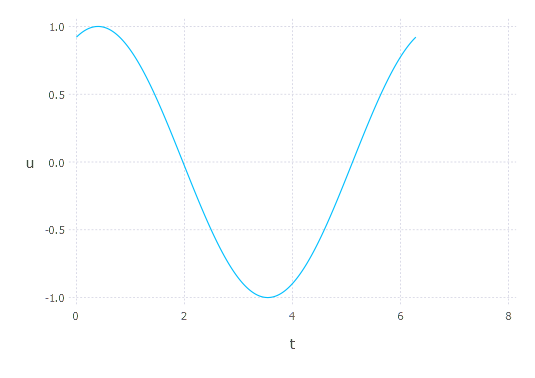

In [7]:
# Probajte za razne vrijednosti x
x=0.4
@manipulate for A in slider(1.0:0.1:2.0, value=1.0),
    k in slider(0.5:0.1:3.0, value=1.0),
    w in slider(0.5:0.1:3.0, value=1.0)
    u(t)=A*cos(k*x-w*t)
    Gadfly.plot(u,0,2*pi,Guide.xlabel("t"),Guide.ylabel("u"))
end

## Linearni valovi

__Linearni valovi__ su rješenja valnih jednadžbi koje su linearne u rješenju $u$. Linearni val uvijek ima isti oblik. 

__Karakteristične krivulje__ su krivulje uzduž kojih je rješenje konstantno.

### Primjer

Rješenje problema početnih vrijednosti

\begin{align*}
&u_t+c\, u_x=0, \quad x\in\mathbb{R}, \quad t>0 \\
&u(x,0)=\phi(x), \quad x\in \mathbb{R},
\end{align*}

je 

$$
u(x,t)=\phi(x-ct).
$$

Karakteristične krivulje su pravci oblika

$$
x-ct=k, \quad k=konst.
$$

i uzduž njih je rješenje očito konstantno, odnosno početna vrijednost se propagira bez promjene. 

Alternativno, možemo provjeriti da je usmjerena derivacija uzduž karakteristične krivulje jednaka nuli: uz oznaku 

$$
x(t)=ct+k
$$

vrijedi

$$
\frac{du(x(t),t)}{dt}=u_x\frac{dx(t)}{dt}+u_t\frac{dt}{dt}
=u_x\cdot c+ u_t=0.
$$

Brzina kojom se val kreće jednaka je

$$
\frac{dx(t)}{dt}=c.
$$

### Primjer

Promotrimo slučaj kada je $c=c(x,t)$. Problem glasi

\begin{align*}
&u_t+c(x,t)\, u_x=0, \quad x\in\mathbb{R}, \quad t>0 \\
&u(x,0)=\phi(x), \quad x\in \mathbb{R}.
\end{align*}

Karakteristične krivulje su definirane s

$$
\frac{dx(t)}{dt}=c(x,t). \tag{1}
$$

Zaista, uzduž svake krivulje koja zadovoljava (1), usmjerena derivacije je jednaka nuli  pa je rješenje konstantno:

$$
\frac{du(x(t),t)}{dt}=u_x\frac{dx(t)}{dt}+u_t\frac{dt}{dt}
=u_x\cdot c(x,t)+ u_t=0.
$$

Brzina kojom se val kreće (kojom se početne vrijednosti propagiraju uzduž katakterističnih krivulja) dana je s (1).

__Zadatak:__ Riješimo problem:

\begin{align*}
&u_t+2t\, u_x=0, \quad x\in\mathbb{R}, \quad t>0 \\
&u(x,0)=e^{-x^2}, \quad x\in \mathbb{R}.
\end{align*}

Karakteristične krivulje su definirane jednadžbom

$$
\frac{dx(t)}{dt}=2t,
$$

čije rješenje je familija krivulja

$$
x(t)=t^2+k.
$$

Točka $(x,t)$ se nalazi na njoj pripadnoj karakterističnoj krivulji pa je vrijednost rješenje jednaka početnoj vrijednosti u točki $x=x(0)=k$. Dakle,

$$
u(x,t)=e^{-k^2}=e^{-(x-t^2)^2}.
$$

U točki $(x,t)$ val se kreće brzinom $2t$ te ubrzava s vremenom, ali uvijek ima isti oblik.

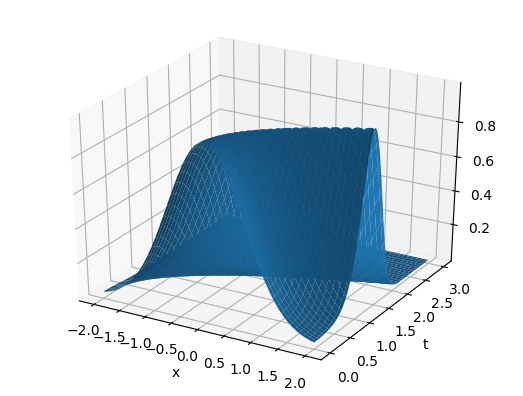

PyObject <matplotlib.text.Text object at 0x00000000461BCE48>

In [8]:
# Rješenje
gridsize=100
x=linspace(-2,2,gridsize)
t=linspace(0,3,gridsize)
X=repmat(x,1,gridsize)
T=repmat(t',gridsize,1)
u(x,t)=exp.(-(x-t.^2).^2)
U=u(X,T)
surf(X,T,U)
xlabel("x")
ylabel("t")